# Mustererkennung/Machine Learning - Assignment 8



In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
class Classifier:
    
    def accuracy(self, labels, predictions):
        return np.mean(labels == predictions)


data = pd.read_csv("../data/iris.csv", header=None)
data.head(n=5)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


#### Splitting the data into training/test and according to their class memberships

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data[list(range(4))], data[4], test_size=0.33, random_state=42, stratify=None)

X_train_setosa = X_train[y_train=='Setosa'].to_numpy()
X_train_versicolor = X_train[y_train=='Versicolor'].to_numpy()
X_train_virginica = X_train[y_train=='Virginica'].to_numpy()

X_test_setosa_v_v = X_test.to_numpy()
y_test_setosa_v_v = (y_test == 'Setosa').astype(int).to_numpy()

X_test_versicolor_virginica = X_test[y_test!='Setosa'].to_numpy()
y_test_versicolor_virginica = (y_test[y_test!='Setosa'] == 'Versicolor').astype(int).to_numpy()

In [4]:
print(X_train)

       0    1    2    3
96   5.7  2.9  4.2  1.3
105  7.6  3.0  6.6  2.1
66   5.6  3.0  4.5  1.5
0    5.1  3.5  1.4  0.2
122  7.7  2.8  6.7  2.0
..   ...  ...  ...  ...
71   6.1  2.8  4.0  1.3
106  4.9  2.5  4.5  1.7
14   5.8  4.0  1.2  0.2
92   5.8  2.6  4.0  1.2
102  7.1  3.0  5.9  2.1

[100 rows x 4 columns]


In [34]:
# using mathematical explanation https://www.youtube.com/watch?v=4Gac5I64LM4
import random

class Perceptron(Classifier):

    def fit(self, P, N, max_iterations=100):
        self.prepare_fit(P, N)
        
        for _ in range(max_iterations):
            self._update_weights()
            if self.accuracy(self.y, (self.X @ self.w) > 0.5) == 1:
                return self.w
        return self.w
    
    def _update_weights(self):
        for x, y in zip(self.X, self.y):
            if y == 1 and x @ self.w <= 0.5:
                self.w += x
            elif y == 0 and x @ self.w > 0.5:
                self.w -= x

    def prepare_fit(self, P, N):
        X_ordered = np.concatenate((np.ones((len(P)+len(N), 1)), np.concatenate((P, N))), axis=1)
        y_ordered = np.concatenate((np.ones(len(P)), np.zeros(len(N))))
        self.X, self.y = shuffle(X_ordered, y_ordered)
        self.w = np.zeros(self.X.shape[1])
    
    def predict(self, X_test):
        ones = np.ones((len(X_test), 1))
        X_test = np.concatenate((ones, X_test), axis=1)
        predictions = X_test @ self.w
        return (predictions > 0.5).astype(int)
    
    def predict_swp(self, X):
        # The activation start with the bias at weights == 0
        activation = self.weights[0]

        # We iterate over the weights and the features in the given row
        for weight, feature in zip(self.weights[1:], X):
            
            activation = activation + (float(weight) * float(feature))

        # Heaviside Step Function Activation
        if activation >= 0.0:
            return 1.0
        return 0.0
    

In [35]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
# Next, we extract the first 100 class labels that correspond to the 50 Iris-Setosa 
# and 50 Iris-Versicolor flowers, respectively:
y_sep_vers = df.iloc[0:100, 4].values

# The we want to convert the class labels into the two integer class labels 1 (Versicolor) and 0 (Setosa) 
# that we assign to a vector y
y_sep_vers = np.where(y_sep_vers == 'Iris-versicolor', 1, 0)
print("y_sep_vers:", y_sep_vers)

# Also, we need to extract the first feature column (sepal length) and the third feature column (petal length) 
# of those 100 training samples and assign them to a feature matrix X:
X_sep_vers = df.iloc[0:100, [0, 2]].values

#===========
y_vers_virg = df.iloc[50:150, 4].values

# The we want to convert the class labels into the two integer class labels 1 (Versicolor) and 0 (Iris-virginica) 
# that we assign to a vector y
y_vers_virg = np.where(y_vers_virg == 'Iris-versicolor', 1, 0)
print("y_vers_virg:", y_vers_virg)

# Also, we need to extract the first feature column (sepal length) and the third feature column (petal length) 
# of those 100 training samples and assign them to a feature matrix X:
X_vers_virg = df.iloc[50:150, [0, 2]].values



y_sep_vers: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
y_vers_virg: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


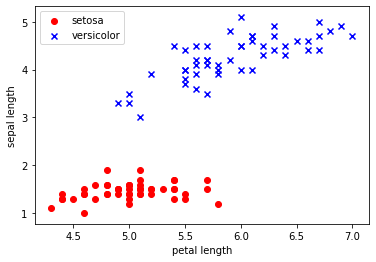

In [36]:
plt.scatter(X_sep_vers[:50, 0], X_sep_vers[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X_sep_vers[50:100, 0], X_sep_vers[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

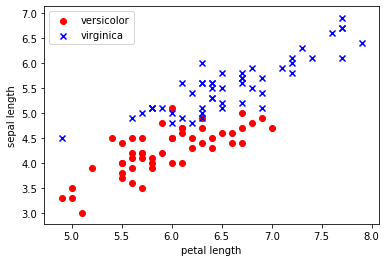

In [37]:
plt.scatter(X_vers_virg[:50, 0], X_vers_virg[:50, 1], color='red', marker='o', label='versicolor')
plt.scatter(X_vers_virg[50:100, 0], X_vers_virg[50:100, 1], color='blue', marker='x', label='virginica')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

In [47]:
model = Perceptron()
model.fit(X_train_setosa, np.concatenate((X_train_versicolor, X_train_virginica)), max_iterations=100)
predictions_setosa_v_v = model.predict(X_test_setosa_v_v)
model.accuracy(y_test_setosa_v_v, predictions_setosa_v_v)

1.0

In [43]:
model.fit(X_train_setosa, np.concatenate((X_train_setosa, X_train_virginica)), max_iterations=1000)
predictions_setosa_v_v = model.predict(X_test_setosa_v_v)
model.accuracy(y_test_setosa_v_v, predictions_setosa_v_v)

1.0

In [46]:
model.fit(X_train_setosa, np.concatenate((X_train_setosa, X_train_versicolor)), max_iterations=1000)
predictions_setosa_v_v = model.predict(X_test_setosa_v_v)
model.accuracy(y_test_setosa_v_v, predictions_setosa_v_v)

0.62

In [45]:
model.fit(X_train_versicolor, X_train_virginica, max_iterations=1000)
predictions_v_v = model.predict(X_test_versicolor_virginica)
model.accuracy(y_test_versicolor_virginica, predictions_v_v)

0.8387096774193549

## Excercise 2. Multilayer-Perceptron (MLP)
Implement a class that builds an MLP with both variable depth D (number of layers) andvariable number of neurons ni for each layer i= 1, ..., D.  
Produce outputs on the ZIP-Dataset

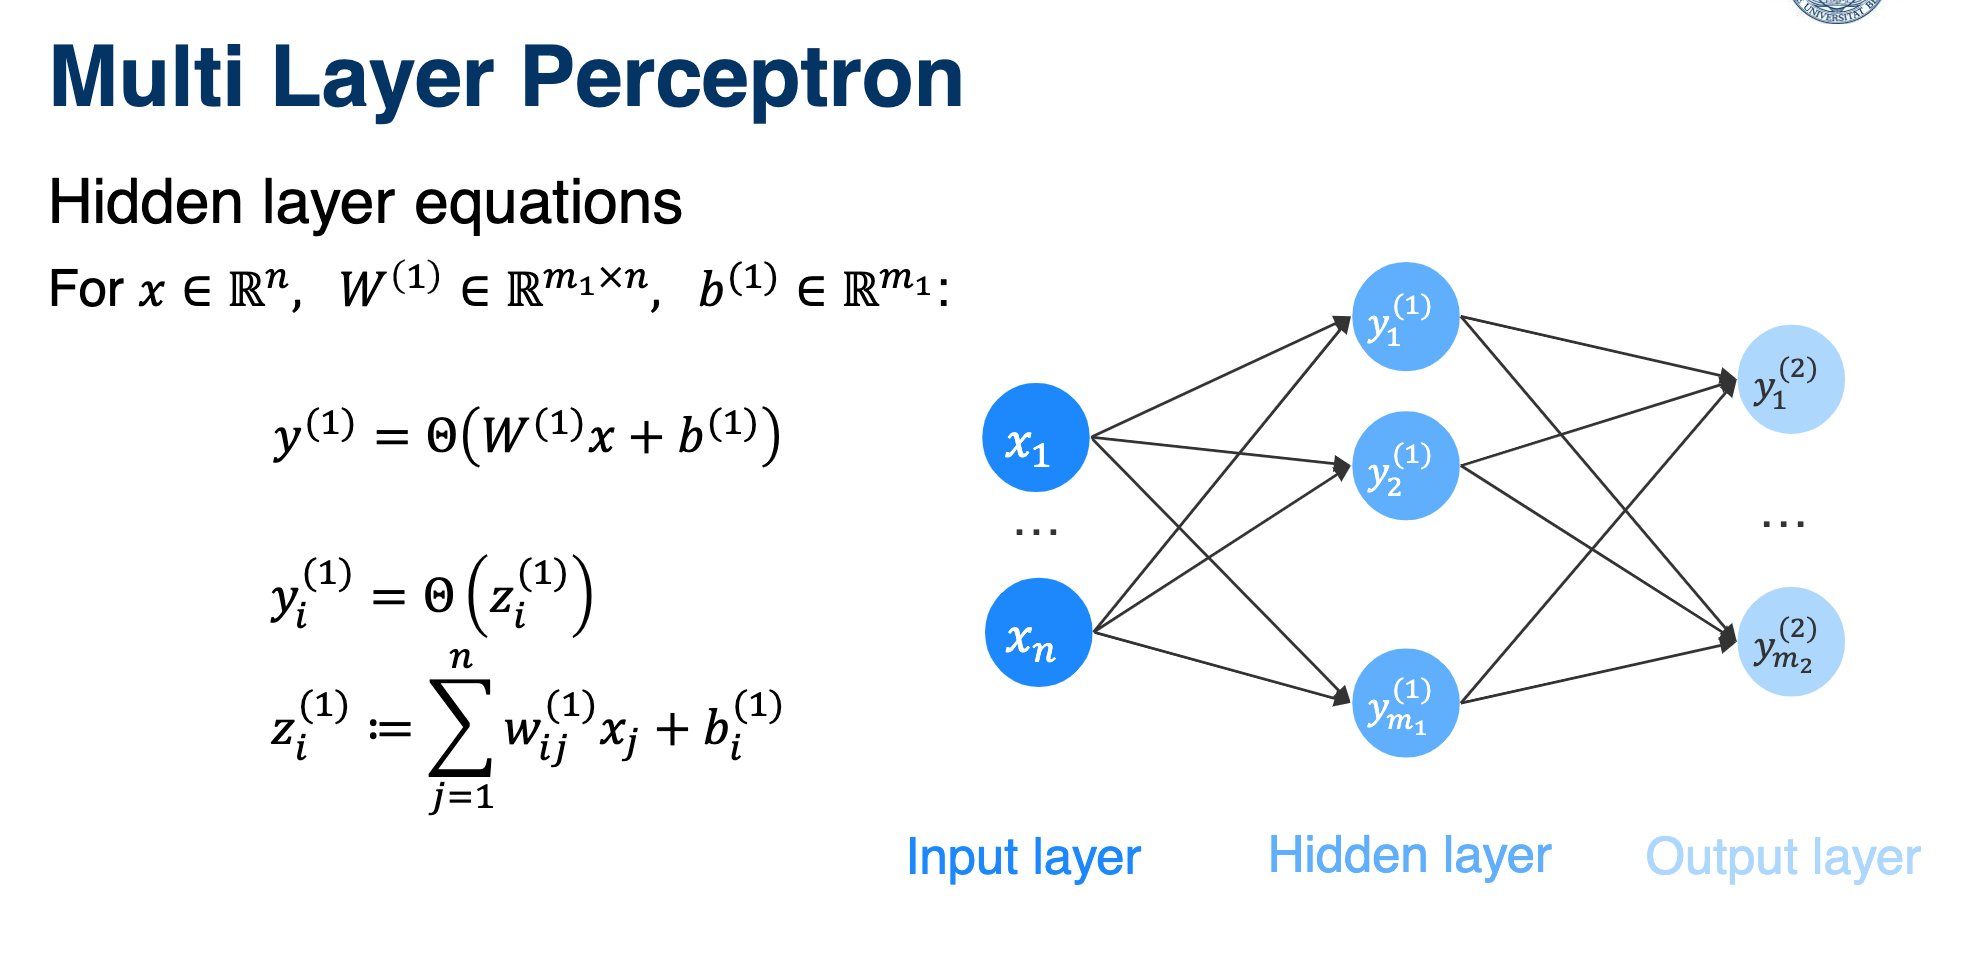

In [48]:
path_to_train = '../data/zip.train'
path_to_test = '../data/zip.test'
training_data = np.array(pd.read_csv(path_to_train, sep=' ', header=None))
test_data = np.array(pd.read_csv(path_to_test, sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]

In [70]:
class MultiLayerPerceptron(Classifier):
    
    def __init__(self, depth=2, n_neurons=16):
        self.n_neurons = n_neurons
        self.depth = depth
        self.perceptron_array = np.array([Perceptron()
                      for _ in range(self.n_neurons)])
        self.layers = np.array([self.perceptron_array 
                       for  _ in range(self.depth)])
        self.input_array = []
        
        print("Created MLP structre: ", self.layers.shape)
        
    def fit(self, X, y, max_iterations): 
                
        for layer in self.layers:
            for perceptron in layer:
                perceptron.fit(X, y, max_iterations)
        
        return self
    
    def predict(self, X): 
        
        self.input_array.append(X)
        
        for layer in self.layers:
            for perceptron in layer:
                preds = perceptron.predict(self.input_array[(-1, -1)])
            self.input_array.append(preds)

        
        return self


In [71]:
mlp_model = MultiLayerPerceptron(2, 16)

Created MLP structre:  (2, 16)


In [72]:
mlp_model.fit(X_train_setosa, np.concatenate((X_train_versicolor, X_train_virginica)), max_iterations=100)
predictions_setosa_v_v = mlp_model.predict(X_test_setosa_v_v)
mlp_model.accuracy(y_test_setosa_v_v, predictions_setosa_v_v)

TypeError: list indices must be integers or slices, not tuple